# インポート

In [1]:
import create_population
import create_population3
import preprocessing
from feature_engineering import FeatureCreator
from feature_engineering_prediction import PredictionFeatureCreator

import prediction
from train_lgbm_rank_niti_cross import Trainer_lightgbm_rank_niti_cv
from train_lgbm_rank_kaiki_cross import Trainer_lightgbm_rank_kaiki_cv
from train_lgbm_time_cross import Trainer_lightgbm_time_cv

from evaluation_lgbm_rank_niti_cross import Evaluator_lightgbm_rank_niti_cross

import pandas as pd


import condition_prediction


from train_lightgbm_rank_niti import Trainer_lightgbm_rank_niti
from train_lightgbm_time import Trainer_lightgbm_time
from train_lightgbm_rank_kaiki import Trainer_lightgbm_rank_kaiki

from evaluation_lightgbm_rank_niti import Evaluator_lightgbm_rank_niti
from evaluation_lightgbm_time_kaiki import Evaluator_lightgbm_time_kaiki
from evaluation_lightgbm_rank_kaiki import Evaluator_lightgbm_rank_kaiki
from evaluation_pop import Evaluator_pop

%load_ext autoreload

In [2]:
%autoreload

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# 学習母集団の作成
- ここで何年までのデータを使うか設定してください
- 2016-01-01から、2024-11-30まではスクレイピングしてあります
- 特徴量が多いため、あまり年月が嵩むと処理が止まる恐れがあります

In [4]:
# population = create_population.create(from_="2016-01-01", to_="2023-12-31")
# population = create_population.create(from_="2020-01-01", to_="2023-12-31")
# population = create_population.create(from_="2016-01-01", to_="2023-12-31")
#テスト用
# population = create_population.create(from_="2022-01-01", to_="2023-12-31")
population = create_population.create(from_="2016-01-01", to_="2024-11-30")

In [5]:
population

,race_id,date,horse_id
0,201606010208,2016-01-09,2010103225
1,201606010208,2016-01-09,2012100619
2,201606010208,2016-01-09,2010104479
3,201606010208,2016-01-09,2010100880
4,201606010208,2016-01-09,2011102192
...,...,...,...
13185,202408060704,2024-11-23,2019104908
13186,202408060704,2024-11-23,2021102960
13187,202408060704,2024-11-23,2017103293
13188,202408060704,2024-11-23,2019106701


# データ加工

In [6]:
#まとめて実行
# レース結果テーブルの前処理
results_preprocessed = preprocessing.process_results()
# 馬の過去成績テーブルの加工
horse_results_preprocessed = preprocessing.process_horse_results()
# レース情報テーブルの前処理
race_info_preprocessed = preprocessing.process_race_info()
# 騎手リーディングテーブルの前処理
jockey_leading_preprocessed = preprocessing.process_jockey_leading()
# 調教師リーディングテーブルの前処理
trainer_leading_preprocessed = preprocessing.process_trainer_leading()
# 血統テーブルの前処理
peds_preprocessed = preprocessing.process_peds()
# 種牡馬リーディングテーブルの前処理
sire_leading_preprocessed = preprocessing.process_sire_leading()
bms_leading_preprocessed = preprocessing.process_sire_leading(
    input_filename="bms_leading.csv",
    output_filename = "bms_leading.csv",
    id_col = "bms_id",
)
# 払い戻しテーブルの前処理_２度目をするならcsvファイルを消さないとダメ
return_tables_preprocessed = preprocessing.process_return_tables()

/Users/iniad/Documents/kenkyu_4/obstacles/src/preprocessing.py:520: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["place_course_category"] = df["place_course_category"].fillna(-1).astype(int)


In [ ]:
# 重複チェック
results_preprocessed.duplicated(subset=["race_id", "horse_id"]).sum()

In [ ]:
# 欠損チェック
results_preprocessed.isnull().sum()

In [ ]:
# 欠損チェック
horse_results_preprocessed.isnull().sum()

In [ ]:
# 重複チェック
horse_results_preprocessed.duplicated(subset=["horse_id", "date"]).sum()

#  特徴量作成

In [7]:
fc = FeatureCreator()
features = fc.create_features()

agg_horse_n_races_relative:   0%|          | 0/4 [00:00<?, ?it/s]

running agg_jockey()...
running agg_jockey()...comp
running agg_trainer()...
running agg_trainer()...comp


agg_horse_per_course_len:   0%|          | 0/4 [00:00<?, ?it/s]

running cross_features()...comp
running agg_interval()...comp
running cross_features_2()...comp


agg_cross_encoded:   0%|          | 0/4 [00:00<?, ?it/s]

running cross_features_3()...comp


agg_cross_zizoku_syunpatu:   0%|          | 0/4 [00:00<?, ?it/s]

running cross_features_4()...comp
running cross_features_5()...comp
running cross_features_6()...comp


pace_category_win_1:   0%|          | 0/4 [00:00<?, ?it/s]

pace_category_win_2:   0%|          | 0/4 [00:00<?, ?it/s]

pace_category_win_3:   0%|          | 0/4 [00:00<?, ?it/s]

pace_category_win_4:   0%|          | 0/4 [00:00<?, ?it/s]

running cross_features_7()...comp


agg_pace_per_score:   0%|          | 0/4 [00:00<?, ?it/s]

running cross_features_8()...comp


agg_goal_per_score:   0%|          | 0/4 [00:00<?, ?it/s]

running cross_features_9()...comp


agg_curve_per_score:   0%|          | 0/4 [00:00<?, ?it/s]

running cross_features_10()...comp


agg_goal_slope_per_score:   0%|          | 0/4 [00:00<?, ?it/s]

running cross_features_11()...comp


agg_stamina_per_score:   0%|          | 0/4 [00:00<?, ?it/s]

running cross_features_12()...comp


agg_pace_per_score:   0%|          | 0/4 [00:00<?, ?it/s]

agg_goal_per_score:   0%|          | 0/4 [00:00<?, ?it/s]

agg_curve_per_score:   0%|          | 0/4 [00:00<?, ?it/s]

agg_goal_slope_per_score:   0%|          | 0/4 [00:00<?, ?it/s]

agg_stamina_per_score:   0%|          | 0/4 [00:00<?, ?it/s]

running cross_features_13()...comp


agg_raceclass_rankdiff_per_score:   0%|          | 0/4 [00:00<?, ?it/s]

running cross_features_14()...comp


speed_index:   0%|          | 0/4 [00:00<?, ?it/s]

running cross_features_15()...comp


agg_horse_per_ground_state_race_type:   0%|          | 0/4 [00:00<?, ?it/s]

agg_horse_per_race_grade:   0%|          | 0/4 [00:00<?, ?it/s]

agg_horse_per_race_type:   0%|          | 0/4 [00:00<?, ?it/s]

agg_horse_per_race_place_len:   0%|          | 0/4 [00:00<?, ?it/s]

agg_horse_per_race_place:   0%|          | 0/4 [00:00<?, ?it/s]

agg_horse_per_weather:   0%|          | 0/4 [00:00<?, ?it/s]

running agg_sire()...
running agg_sire()...comp
running agg_bms()...
running agg_bms()...comp
merging all features...
merging all features...comp


In [ ]:
#もしもカーネルがリセットした場合、ここからfeatureをとる
features = pd.read_csv("../data/02_features/features.csv", sep="\t")

In [ ]:
# 重複チェック
features.duplicated(subset=["race_id", "horse_id"]).sum()

In [ ]:
#特徴量を変更した場合に実行、"config_lightgbm_niti_new.yaml"に特徴量リストが入る
list(features.columns)
import yaml
feature_cols = {
    "features": features.columns.drop(
        ["date","rank","rank_per_horse","time","nobori","corner_1","corner_2","corner_3","corner_4",
                        "corner_1_per_horse","corner_2_per_horse",
                        "corner_3_per_horse",
                        "corner_4_per_horse", "owner_id"]
    ).to_list()
}
print(feature_cols)
with open("config_lightgbm_niti_new.yaml","w") as file:
    yaml.dump(feature_cols,file
              )

# 学習
- 特徴量にオッズを利用したもの、利用していないもの
- rank列を二値分類で予測したもの、回帰で予測したもの、time列を予測したもの
- ホールドアウト法、cv(クロスバリデーション)を利用したもの
- その他、独自の特徴量のみを利用したものなど、さまざまな学習モデルを作成する段階です
- config_filepath="config_lightgbm_kaiki_odds_removed.yaml"の部分を変更することで、特徴量やハイパーパラメータを変更できます
- 好きな特徴量を選んで、学習させてください（保存先のファイル名の変更も忘れずに）

In [7]:
#オッズあり、ランク二値、ホールドアウト法
trainer = Trainer_lightgbm_rank_niti()
evaluation_df = trainer.run(
    valid_start_date="2021-01-01",
    test_start_date="2023-01-01"
)

Training until validation scores don't improve for 100 rounds
[100]	valid_0's binary_logloss: 0.259009
[200]	valid_0's binary_logloss: 0.250677
[300]	valid_0's binary_logloss: 0.249368
[400]	valid_0's binary_logloss: 0.251441
Early stopping, best iteration is:
[300]	valid_0's binary_logloss: 0.249368


,race_id,horse_id,target,rank,tansho_odds,popularity,umaban,pred
10073,202306010208,2016100158,1,1,4.4,2,11,0.093207
10074,202306010208,2016100569,0,2,6.5,4,10,0.159314
10075,202306010208,2016103252,0,3,3.9,1,9,0.162027
10076,202306010208,2014102394,0,4,76.6,11,6,0.010448
10077,202306010208,2018102953,0,5,5.0,3,5,0.130441
...,...,...,...,...,...,...,...,...
12498,202408060704,2017105602,0,6,3.5,2,5,0.076501
12499,202408060704,2019104908,0,7,14.0,6,11,0.043336
12500,202408060704,2021102960,0,8,30.2,8,4,0.025734
12501,202408060704,2017103293,0,9,6.4,4,7,0.076404


-------------------- Metrics --------------------
Log Loss: 0.2501
Accuracy: 0.7000
Precision: 0.2106
Recall: 0.7948
F1 Score: 0.3330
ROC AUC: 0.8253
test_df's binary_logloss: 0.2500968403616628


In [8]:
#オッズあり、ランク回帰、ホールドアウト法
trainer = Trainer_lightgbm_rank_kaiki()
evaluation_df = trainer.run(
    valid_start_date="2021-01-01",
    test_start_date="2023-01-01"
)

Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 2.83664
[200]	valid_0's rmse: 2.70297
[300]	valid_0's rmse: 2.6385
[400]	valid_0's rmse: 2.59624
[500]	valid_0's rmse: 2.57307
[600]	valid_0's rmse: 2.56208
[700]	valid_0's rmse: 2.55543
[800]	valid_0's rmse: 2.55023
[900]	valid_0's rmse: 2.54804
[1000]	valid_0's rmse: 2.54489
[1100]	valid_0's rmse: 2.54501
[1200]	valid_0's rmse: 2.54406
[1300]	valid_0's rmse: 2.54314
[1400]	valid_0's rmse: 2.54331
Early stopping, best iteration is:
[1342]	valid_0's rmse: 2.54273


,race_id,horse_id,target,rank,tansho_odds,popularity,umaban,pred
10073,202306010208,2016100158,1,1,4.4,2,11,4.008649
10074,202306010208,2016100569,2,2,6.5,4,10,6.223834
10075,202306010208,2016103252,3,3,3.9,1,9,4.686322
10076,202306010208,2014102394,4,4,76.6,11,6,6.545256
10077,202306010208,2018102953,5,5,5.0,3,5,3.268558
...,...,...,...,...,...,...,...,...
12498,202408060704,2017105602,6,6,3.5,2,5,4.759968
12499,202408060704,2019104908,7,7,14.0,6,11,5.435130
12500,202408060704,2021102960,8,8,30.2,8,4,5.506498
12501,202408060704,2017103293,9,9,6.4,4,7,5.710846


/Users/iniad/miniconda3/envs/kenkyu4/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/iniad/miniconda3/envs/kenkyu4/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


NameError: name 'r2_score' is not defined

In [4]:
#オッズあり、time回帰、ホールドアウト法
trainer = Trainer_lightgbm_time()
evaluation_df = trainer.run(
    valid_start_date="2021-01-01",
    test_start_date="2023-01-01"
)

KeyboardInterrupt: 

In [ ]:
# オッズと人気を特徴量から省いたランク、二値、ホールドアウト法
trainer = Trainer_lightgbm_rank_niti(config_filepath="config_lightgbm_niti_odds_removed.yaml")
evaluation_df = trainer.run(
    valid_start_date="2021-01-01",
    test_start_date="2023-01-01",
    importance_filename="importance_lightgbm_rank_niti_odds_removed",
    model_filename="model_lightgbm_rank_niti_odds_removed.pkl",
    evaluation_filename="evaluation_lightgbm_rank_niti_odds_removed.csv"
)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.230809 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 677498
[LightGBM] [Info] Number of data points in the train set: 7344, number of used features: 2853
[LightGBM] [Info] Start training from score 204.093587
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 7.33183
[200]	valid_0's rmse: 3.65035
[300]	valid_0's rmse: 2.84005
[400]	valid_0's rmse: 2.71584
[500]	valid_0's rmse: 2.69879
[600]	valid_0's rmse: 2.69975
Early stopping, best iteration is:
[505]	valid_0's rmse: 2.69813


,race_id,horse_id,target,rank,tansho_odds,popularity,umaban,pred
10073,202306010208,2016100158,218.4,1,4.4,2,11,216.181652
10074,202306010208,2016100569,218.5,2,6.5,4,10,216.561197
10075,202306010208,2016103252,218.7,3,3.9,1,9,217.373587
10076,202306010208,2014102394,218.9,4,76.6,11,6,216.620418
10077,202306010208,2018102953,219.1,5,5.0,3,5,216.497761
...,...,...,...,...,...,...,...,...
12498,202408060704,2017105602,202.2,6,3.5,2,5,205.792623
12499,202408060704,2019104908,205.0,7,14.0,6,11,202.970840
12500,202408060704,2021102960,205.5,8,30.2,8,4,202.571526
12501,202408060704,2017103293,208.8,9,6.4,4,7,202.713665


-------------------- Metrics --------------------
RMSE: 2.9141
値が1に近いほど良いR²: 0.9766
test_df's root_mean_squared_error: 2.914062095929303


/Users/iniad/miniconda3/envs/kenkyu4/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/iniad/miniconda3/envs/kenkyu4/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


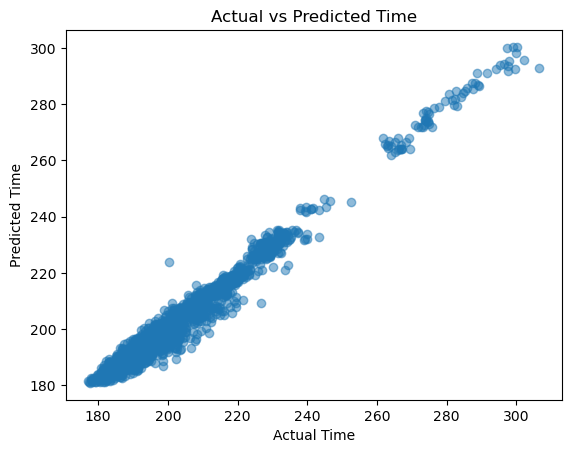

In [5]:
# オッズと人気を特徴量から省いた場合,time回帰,ホールドアウト法
trainer = Trainer_lightgbm_time(config_filepath="config_lightgbm_kaiki_odds_removed.yaml")
evaluation_df = trainer.run(
    valid_start_date="2021-01-01",
    test_start_date="2023-01-01",
    importance_filename="importance_lightgbm_time_odds_removed",
    model_filename="model_lightgbm_time_odds_removed.pkl",
    evaluation_filename="evaluation_lightgbm_time_odds_removed.csv"
)

In [ ]:
# オッズと人気を特徴量から省いたランク、回帰、ホールドアウト法
trainer = Trainer_lightgbm_rank_kaiki(config_filepath="config_lightgbm_kaiki_odds_removed.yaml")
evaluation_df = trainer.run(
    valid_start_date="2021-01-01",
    test_start_date="2023-01-01",
    importance_filename="importance_lightgbm_rank_kaiki_odds_removed",
    model_filename="model_lightgbm_rank_kaiki_odds_removed.pkl",
    evaluation_filename="evaluation_lightgbm_rank_kaiki_odds_removed.csv"
)

In [ ]:
# オッズと人気を特徴量から省いたランク、二値、クロスバリデーション
trainer = Trainer_lightgbm_rank_niti_cv(config_filepath="config_lightgbm_niti_odds_removed.yaml")
evaluation_df = trainer.run(
    n_splits = 3,
    importance_filename="importance_lightgbm_rank_niti_cv_odds_removed",
    model_filename="model_lightgbm_rank_niti_cv_odds_removed.pkl",
    evaluation_filename="evaluation_lightgbm_rank_niti_cv_odds_removed.csv",
    final_model_filename = "model_lightgbm_rank_niti_cv_full_odds_removed.pkl"
)

In [ ]:
#全体のレースを学習した際、最後のブースト回数よりも多いか確認
import lightgbm as lgb
import pickle

from pathlib import Path
DATA_DIR = Path("..", "data")
INPUT_DIR = DATA_DIR / "02_features"
OUTPUT_DIR = DATA_DIR / "03_train"

# モデルの読み込み
with open(OUTPUT_DIR/"model_lightgbm_rank_niti_cv_full_odds_removed.pkl", "rb") as f:
    model = pickle.load(f)

# ブースト回数の取得
num_trees = model.num_trees()

print(f"ブースト回数（num_boost_round）: {num_trees}")

In [ ]:
# オッズと人気を特徴量から省いたランク、回帰、クロスバリデーション
trainer = Trainer_lightgbm_rank_kaiki_cv(config_filepath="config_lightgbm_kaiki_odds_removed.yaml")
evaluation_df = trainer.run(
    n_splits = 3,
    importance_filename="importance_lightgbm_rank_kaiki_cv_odds_removed",
    model_filename="model_lightgbm_rank_kaiki_cv_odds_removed.pkl",
    evaluation_filename="evaluation_lightgbm_rank_kaiki_cv_odds_removed.csv",
    final_model_filename = "model_lightgbm_rank_kaiki_cv_full_odds_removed.pkl"
)

In [6]:
# オッズと人気を特徴量から省いたランク、回帰、クロスバリデーション
trainer = Trainer_lightgbm_time_cv(config_filepath="config_lightgbm_kaiki_odds_removed.yaml")
evaluation_df = trainer.run(
    n_splits = 3,
    importance_filename="importance_lightgbm_time_cv_odds_removed",
    model_filename="model_lightgbm_time_cv_odds_removed.pkl",
    evaluation_filename="evaluation_lightgbm_time_cv_odds_removed.csv",
    final_model_filename = "model_lightgbm_time_cv_full_odds_removed.pkl"
)

Training fold 1/3...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.111973 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 669403
[LightGBM] [Info] Number of data points in the train set: 4167, number of used features: 2850
[LightGBM] [Info] Start training from score 203.518838
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 7.45141
[200]	valid_0's rmse: 3.93545
[300]	valid_0's rmse: 3.15786
[400]	valid_0's rmse: 3.01094
[500]	valid_0's rmse: 2.97518
[600]	valid_0's rmse: 2.9678
[700]	valid_0's rmse: 2.96655
[800]	valid_0's rmse: 2.96723
Early stopping, best iteration is:
[751]	valid_0's rmse: 2.96642


/Users/iniad/miniconda3/envs/kenkyu4/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/iniad/miniconda3/envs/kenkyu4/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


-------------------- Metrics --------------------
RMSE: 2.9664
値が1に近いほど良いR²: 0.9749
test_df's root_mean_squared_error: 2.9664158632775943
Training fold 2/3...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.192027 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 679522
[LightGBM] [Info] Number of data points in the train set: 8334, number of used features: 2865
Training until validation scores don't improve for 100 rounds
[800]	valid_0's rmse: 2.93014
[900]	valid_0's rmse: 2.94362
Early stopping, best iteration is:
[815]	valid_0's rmse: 2.9271


/Users/iniad/miniconda3/envs/kenkyu4/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/Users/iniad/miniconda3/envs/kenkyu4/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


-------------------- Metrics --------------------
RMSE: 2.9271
値が1に近いほど良いR²: 0.9767
test_df's root_mean_squared_error: 2.9271012327400974
Training final model using all data...
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.324718 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 684223
[LightGBM] [Info] Number of data points in the train set: 12503, number of used features: 2867
Final model training completed.


# 精度評価
- popは人気列にかけた場合の回収率、的中率です
- topnはそのモデルが評価した上からn番目にかけた場合の的中回収です
- 例えばtop4の馬単にかけた場合上から4つの馬をかけた、4*3=12通りの的中率、回収率を計算します
- なので、馬単と馬連などの的中率は同じになりますが、回収率は変わります

In [ ]:
#オッズあり、ランク、二値、ホールドアウト
evaluator = Evaluator_lightgbm_rank_niti()
summary_df_gbm = evaluator.summarize_box_exp(exp_name="lightgbm_rank_niti")
summary_df_gbm

In [ ]:
# オッズあり、ランク、回帰、ホールドアウト
evaluator = Evaluator_lightgbm_rank_kaiki(evaluation_filename="evaluation_lightgbm_rank_kaiki.csv")
summary_df_noodds_time = evaluator.summarize_box_exp(exp_name="lightgbm_rank_kaiki")
summary_df_noodds_time

In [ ]:
# オッズあり、タイム、回帰、ホールドアウト
evaluator = Evaluator_lightgbm_time_kaiki(evaluation_filename="evaluation_lightgbm_time.csv")
summary_df_time = evaluator.summarize_box_exp(exp_name="lightgbm_time")
summary_df_time

In [ ]:
# オッズと人気を特徴量から省いた場合、ランク、二値、ホールドアウト
evaluator = Evaluator_lightgbm_rank_niti(evaluation_filename="evaluation_lightgbm_rank_niti_odds_removed.csv")
summary_df_noodds_gbm = evaluator.summarize_box_exp(exp_name="lightgbm_rank_niti_noodds")
summary_df_noodds_gbm

In [ ]:
# オッズと人気を特徴量から省いた場合,ランク、回帰、ホールドアウト
evaluator = Evaluator_lightgbm_rank_kaiki(evaluation_filename="evaluation_lightgbm_rank_kaiki_odds_removed.csv")
summary_df_noodds_time = evaluator.summarize_box_exp(exp_name="lightgbm_rank_kaiki_noodds")
summary_df_noodds_time

In [ ]:
# オッズと人気を特徴量から省いた場合,タイム、回帰、ホールドアウト
evaluator = Evaluator_lightgbm_time_kaiki(evaluation_filename="evaluation_lightgbm_time_odds_removed.csv")
evaluator.summarize_box_top_n(n=3,save_filename="box_summary_time_noodds_top3.csv")
summary_df_noodds_time = evaluator.summarize_box_exp(exp_name="lightgbm_time_noodds")
summary_df_noodds_time

In [ ]:
# オッズと人気を特徴量から省いた場合_ランク、二値、クロスバリデーション（最終番目）
evaluator = Evaluator_lightgbm_rank_niti_cross(evaluation_filename="evaluation_lightgbm_rank_niti_cv_odds_removed.csv")
evaluator.summarize_box_top_n(n=3,save_filename="box_summary_rank_niti_cross_noodds_top3.csv")
summary_df_noodds_gbm = evaluator.summarize_box_exp(exp_name="lightgbm_rank_niti_cross_noodds")
summary_df_noodds_gbm

In [ ]:
# オッズと人気を特徴量から省いた場合_ランク、回帰、クロスバリデーション（最終番目）
evaluator = Evaluator_lightgbm_rank_kaiki(evaluation_filename="evaluation_lightgbm_rank_kaiki_cv_odds_removed.csv")
evaluator.summarize_box_top_n(n=3,save_filename="box_summary_rank_kaiki_cross_noodds_top3.csv")
summary_df_noodds_gbm = evaluator.summarize_box_exp(exp_name="lightgbm_rank_kaiki_cross_noodds")
summary_df_noodds_gbm

In [7]:
# オッズと人気を特徴量から省いた場合_time、回帰、クロスバリデーション（最終番目）
evaluator = Evaluator_lightgbm_time_kaiki(evaluation_filename="evaluation_lightgbm_time_cv_odds_removed.csv")
evaluator.summarize_box_top_n(n=3,save_filename="box_summary_time_cross_noodds_top3.csv")
summary_df_noodds_gbm = evaluator.summarize_box_exp(exp_name="lightgbm_time_cross_noodds")
summary_df_noodds_gbm

,topn,bet_type,hitrate_lightgbm_time_cross_noodds,returnrate_lightgbm_time_cross_noodds,hitrate_pop,returnrate_pop
0,1,単勝,0.344459,1.350734,0.371162,0.851001
1,1,複勝,0.690254,1.189720,0.703605,0.891722
2,2,ワイド,0.372497,1.991589,0.369826,0.903738
3,2,単勝,0.526035,1.168358,0.576769,0.852537
4,2,複勝,0.898531,1.197330,0.885180,0.882109
5,2,馬単,0.180240,2.541455,0.189586,1.040053
6,2,馬連,0.180240,2.711081,0.189586,1.056876
7,3,ワイド,0.623498,1.849043,0.630174,0.899377
8,3,三連単,0.126836,3.569693,0.109479,0.775412
9,3,三連複,0.126836,4.197864,0.109479,0.978104


# 予測当日の処理

## 事前準備
**当日出走馬が確定した時点**で実行できる

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [ ]:
# 当日出走馬の過去成績テーブルの前処理_そのままで使えない未加工のデータを加工する
horse_results_preprocessed = preprocessing.process_horse_results(
    input_filename="horse_results_prediction.csv",
    output_filename="horse_results_prediction.csv"
)
horse_results_preprocessed

In [ ]:
population = create_population.create(from_="2016-01-01", to_="2024-11-31")

In [ ]:
# 当日出走馬の血統テーブルの前処理
peds_preprocessed = preprocessing.process_peds(
    input_filename="peds_prediction.csv",
    output_filename="peds_prediction.csv"
)
peds_preprocessed

In [ ]:
pfc = PredictionFeatureCreator()
# 過去成績集計は事前に行うことができる
pfc.create_baselog()
pfc.agg_horse_n_races()
pfc.agg_horse_n_races_relative()
pfc.agg_horse_n_races_df

In [ ]:
# レース結果テーブルの前処理
results_preprocessed = condition_prediction.process_results()
# レース情報テーブルの前処理
race_info_preprocessed = condition_prediction.process_race_info()
create_race_grade_preprocessed = condition_prediction.create_race_grade()


## 当日の予測処理
レース直前出走直前に実行する

In [ ]:
#当日にやらないと、天気や馬場状態がわからないので、当日に実行してください、
# 特徴量の更新
features = pfc.create_features(
    race_id="202408060411",  # 予測するレースidを指定
    date_content_a = "2024年11月10日", #"%Y年%m月%d日"形式で該当レース当日の日付を入れてください    
    skip_agg_horse=True  # 事前に集計した場合はスキップできる
)

In [ ]:
pfc.results

In [ ]:
pfc.race_info

### pred列は全て降順（大きい順）で表示されます
### 二値予測のrankはpred列が大きい順で評価がよく、回帰のrankとtimeは小さい順で評価が良いです
### 順番が逆になっているので気をつけてください

In [ ]:
# 予測/オッズあり、ランク、二値、ホールドアウト
prediction.predict(features)

In [ ]:
# オッズ除外モデルでの予測、ランク、二値、ホールドアウト
prediction.predict(
    features,
    model_filename="model_lightgbm_rank_niti_odds_removed.pkl",
    config_filepath="config_lightgbm_niti_odds_removed.yaml"
)

In [ ]:
# オッズあり予測、ランク、二値、ホールドアウト
prediction.predict(
    features,
    model_filename="model_lightgbm_rank_kaiki.pkl",
    config_filepath="config_lightgbm_kaiki.yaml"
)

In [ ]:
# オッズ除外モデルでの予測、ランク、回帰、ホールドアウト
prediction.predict(
    features,
    model_filename="model_lightgbm_rank_kaiki_odds_removed.pkl",
    config_filepath="config_lightgbm_kaiki_odds_removed.yaml"
)

In [ ]:
# オッズありtimeモデルでの予測、ホールドアウト
prediction.predict(
    features,
    model_filename="model_lightgbm_time.pkl",
    config_filepath="config_lightgbm_kaiki.yaml"
)

In [ ]:
# オッズ除外モデルでの予測、time、ホールドアウト
prediction.predict(
    features,
    model_filename="model_lightgbm_time_odds_removed.pkl",
    config_filepath="config_lightgbm_kaiki_odds_removed.yaml"
)

In [ ]:
# オッズ除外モデルでの予測、ランク、二値、クロスバリデーション
prediction.predict(
    features,
    model_filename="model_lightgbm_rank_niti_cv_full_odds_removed.pkl",
    config_filepath="config_lightgbm_niti_odds_removed.yaml"
)

In [ ]:
# オッズ除外モデルでの予測、ランク、回帰、クロスバリデーション
prediction.predict(
    features,
    model_filename="model_lightgbm_rank_kaiki_cv_full_odds_removed.pkl",
    config_filepath="config_lightgbm_kaiki_odds_removed.yaml"
)

In [ ]:
# オッズ除外モデルでの予測、time、クロスバリデーション
prediction.predict(
    features,
    model_filename="model_lightgbm_time_cv_full_odds_removed.pkl",
    config_filepath="config_lightgbm_kaiki_odds_removed.yaml"
)